In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df= pd.read_excel('../dataset/WorkPlaceSatisfactionSurveyData.xlsx')
df= df.drop(['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'], axis=1)

In [9]:
df.describe()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [12]:
df1=pd.DataFrame(df)

gender_percentile = df1['gender'].value_counts(normalize=True) * 100

gender_pay = df1.groupby('gender')['salary'].mean()
gender_pay_index = ['Male', 'Female']

gender_management = pd.crosstab(df1['gender'], df1['sat_management'])
gender_management.columns=['dislikes', 'somewhat dislikes', 'neutral', 'somewhat positive', 'positive']
gender_management.index = ['Male', 'Female']

gender_management
gender_percentile
gender_pay

gender
1    2663.746032
2    2232.736842
Name: salary, dtype: float64

In [13]:
df2=pd.DataFrame(df)
bins = [0,10,20,30,40,50,60,70,80,90]
labels= ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, right=True, include_lowest=True)
age_group_crosstab = pd.crosstab(index=df2['age_group'], columns='count')
##df2=pd.crosstab(df2['age_group'],'sat_management')
age_group_crosstab
df2['gender'] = df2['gender'].map({1: 'Male', 2: 'Female'})
gender_age_analysis = pd.crosstab(df2['age_group'], df2['gender'])
gender_age_analysis


gender,Female,Male
age_group,,
11-20,0,1
21-30,1,18
31-40,11,24
41-50,3,13
51-60,4,6
61-70,0,1


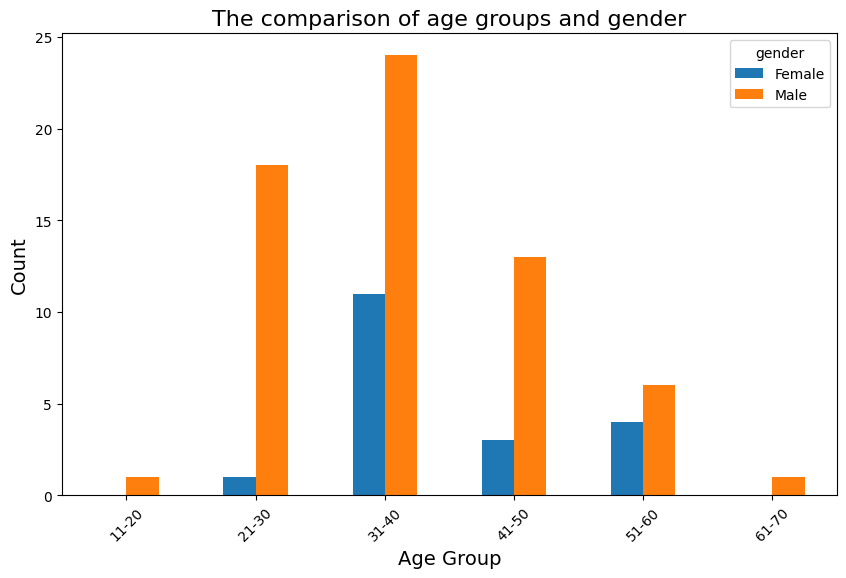

In [14]:
gender_age_analysis.plot(kind='bar', figsize=(10,6))

# Add chart labels and title
plt.title('The comparison of age groups and gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

In [15]:
df2['service_group'] = pd.cut(df2['years_of_service'], bins=bins, labels=labels, right=True, include_lowest=True)
age_service_crosstab = pd.crosstab(index=df2['age_group'], columns=df2['service_group'], margins=True)
age_service_crosstab

service_group,0-10,11-20,21-30,31-40,All
age_group,,,,,
11-20,1,0,0,0,1
21-30,17,0,1,0,18
31-40,14,15,5,0,34
41-50,4,7,5,0,16
51-60,2,4,3,1,10
61-70,0,0,0,1,1
All,38,26,14,2,80


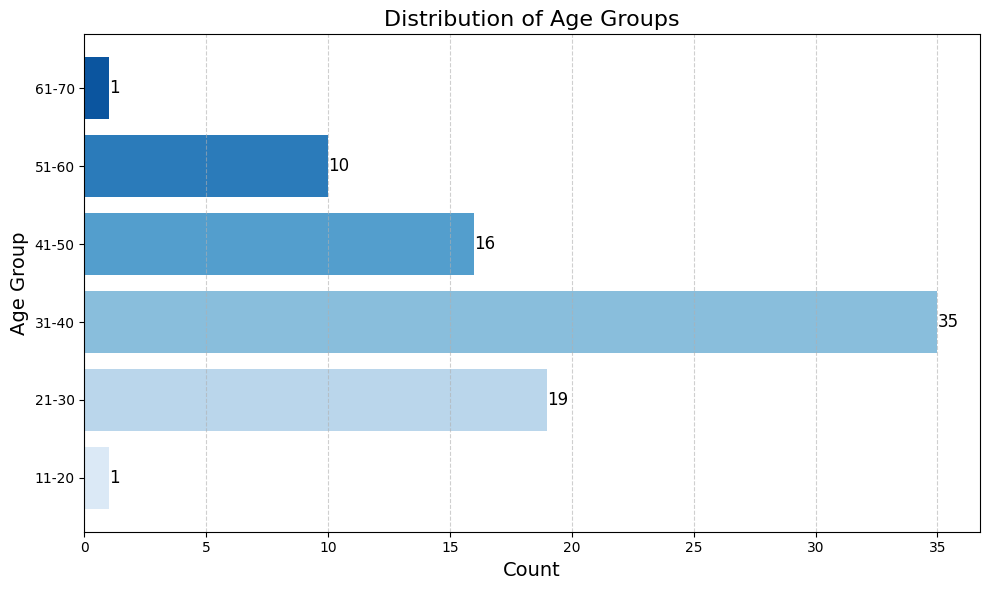

In [16]:
colors = sns.color_palette("Blues", len(age_group_crosstab))

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(age_group_crosstab.index, age_group_crosstab['count'], color=colors)

# Add data labels (annotations) to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', ha='left', fontsize=12)

# Add labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.title('Distribution of Age Groups', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Display the chart
plt.tight_layout()
plt.show()

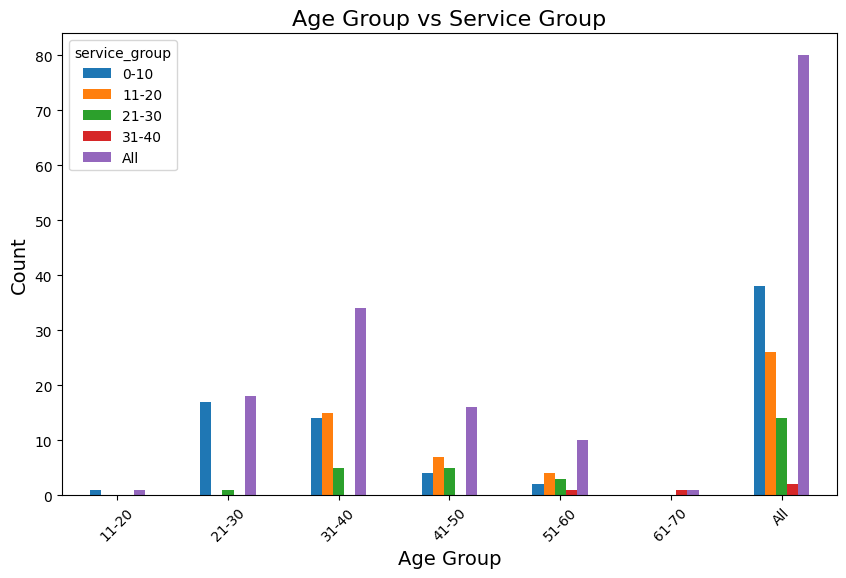

In [17]:
age_service_crosstab.plot(kind='bar', figsize=(10,6))

# Add chart labels and title
plt.title('Age Group vs Service Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

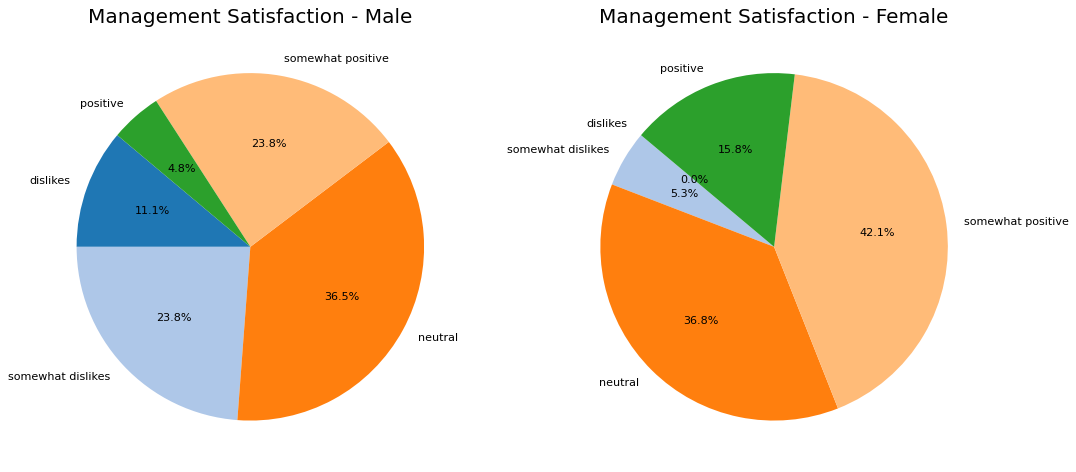

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=80)

# Plot pie chart for Male
axs[0].pie(gender_management.loc['Male'], labels=gender_management.columns, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axs[0].set_title('Management Satisfaction - Male', fontsize=18)

# Plot pie chart for Female
axs[1].pie(gender_management.loc['Female'], labels=gender_management.columns, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axs[1].set_title('Management Satisfaction - Female', fontsize=18)

# Adjust layout
plt.tight_layout()

# Display the pie charts
plt.show()

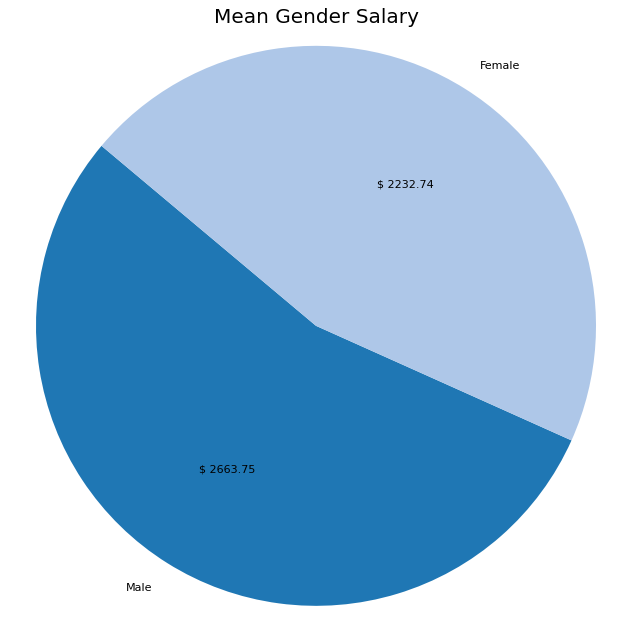

In [19]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

# Plot pie chart for mean gender salary
# The lambda function in `autopct` shows the actual mean salary values
ax.pie(gender_pay, labels=gender_pay_index, 
       autopct=lambda p: f'$ {p * sum(gender_pay) / 100:.2f}',  # Display actual salary values
       startangle=140, colors=plt.cm.tab20.colors)

# Title
ax.set_title('Mean Gender Salary', fontsize=18)

# Equal aspect ratio ensures the pie chart is circular
ax.axis('equal')

# Display the pie chart
plt.tight_layout()
plt.show()

In [20]:
#SAMILLE KOLUMNIT (FAMILY JA YEARS_OF_SERVICE) MINÄ IIRO OTAN (EDUCATION JA SALARY)
#oisko mitään jos df1=gender, df2=ikä, df3=family, df4=education jne.

In [ ]:
names = ['Has a family', 'Does not have a family']
df3=df['family'].value_counts()

plt.pie(df3, labels=names, colors=['gold','olivedrab'], autopct='%1.1f%%')
plt.show()

df1=pd.DataFrame(df)
gender_yearsofservice = df1.groupby('gender')['years_of_service'].mean()
gender_yearsofservice

ax3 = sns.boxplot(x = df['family'], y = df['years_of_service'])
ax3.set_xlabel('Family, n=' + str(df['family'].count()))
ax3.set_ylabel('Years of service n=' + str(df['years_of_service'].count()))

In [21]:
df4=pd.crosstab(df['education'], 'Count')
df4.index=['Primary school', 'Vocational school', 'Secondary school', 'Applied science school']
df4['%'] = df4['Count'] / df4['Count'].sum() * 100

df4.columns.name=''
df4

,Count,%
Primary school,27,33.333333
Vocational school,30,37.037037
Secondary school,22,27.160494
Applied science school,2,2.469136


Text(0, 0.5, 'Educations')

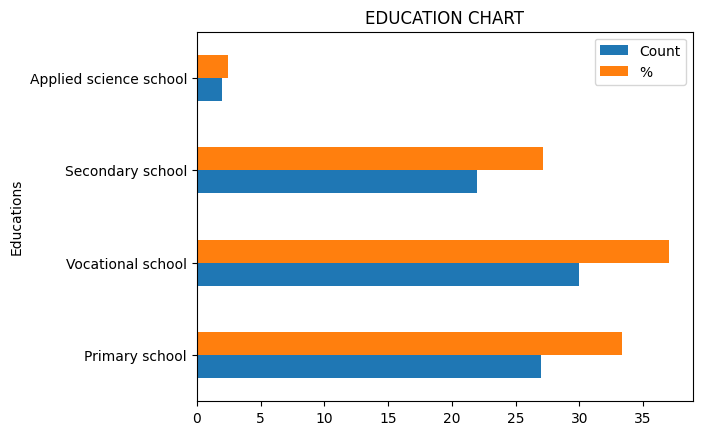

In [22]:
df4.plot.barh()
plt.title('EDUCATION CHART')
plt.xlabel('')
plt.ylabel('Educations')


In [23]:
df4 = pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100
df4.index = ['Primary school', 'Vocational school', 'Secondary school', 'Applied science university']
df4.columns = ['woman', 'man']
df4

,woman,man
Primary school,35.483871,26.315789
Vocational school,37.096774,36.842105
Secondary school,24.193548,36.842105
Applied science university,3.225806,0.000000


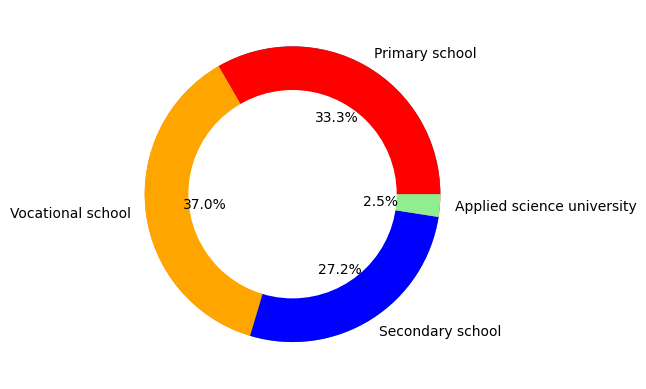

In [24]:
#Total number of each education level
names = ['Primary school', 'Vocational school', 'Secondary school', 'Applied science university']
df4=[27,30,22,2]

# Create a pieplot
plt.pie(df4)

# Give color names
plt.pie(df4, labels=names, colors=['red','orange','blue','lightgreen'], autopct='%1.1f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [25]:
df6=pd.crosstab(df['salary'], 'Count')
df6['%'] = df6['Count'] / df6['Count'].sum() * 100

df6.columns.name=''
df6

,Count,%
salary,,
1521,1,1.219512
1559,2,2.439024
1598,2,2.439024
1638,1,1.219512
1715,1,1.219512
1872,3,3.658537
1910,1,1.219512
1949,3,3.658537
1989,5,6.097561


Text(0, 0.5, 'age')

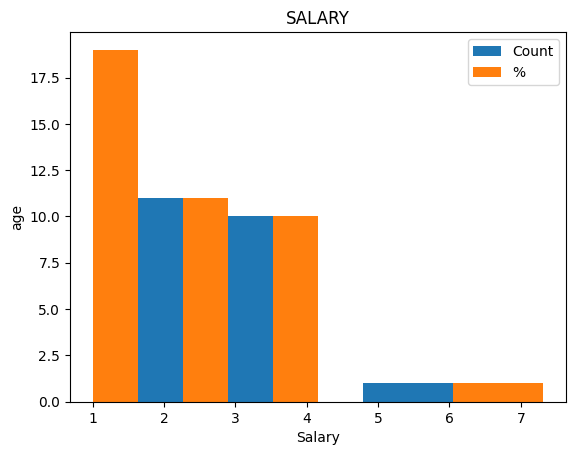

In [26]:
#tarvitaan df7 joka käyny läpi salaryn ja agen 
df6.plot.hist()

plt.title('SALARY')
plt.xlabel('Salary')
plt.ylabel('age')

#plt.xlim(1250, 3000)
#plt.ylim(10, 70)


TypeError: text() missing 1 required positional argument: 's'

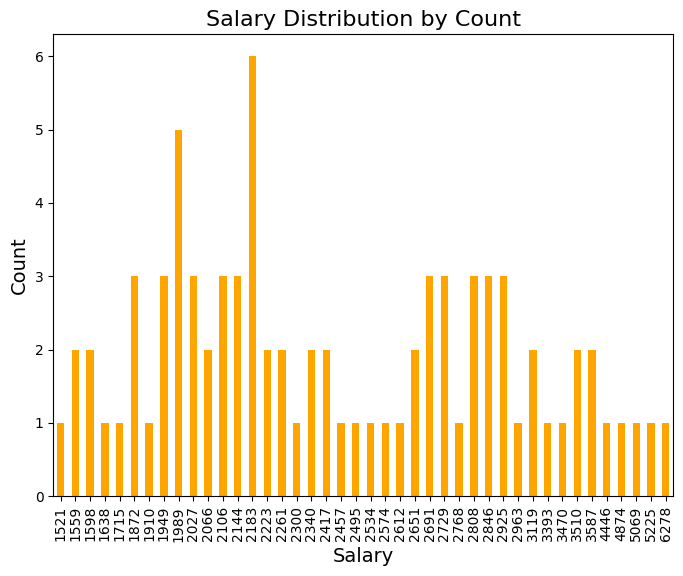

In [27]:
# Create the bar chart for the 'Count' column
plt.figure(figsize=(8,6))  # Set figure size
df6['Count'].plot(kind='bar', color='orange')

# Add titles and labels
plt.title('Salary Distribution by Count', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display percentage values on top of each bar
for index, value in enumerate(df6['Count']):
    plt.text(index, value + 1, ha='center')

plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()